In [57]:
#preprocessing and visualization modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.style
matplotlib.style.use('bmh')
from matplotlib.pylab import rcParams
import seaborn as sns
from IPython.display import display

#Time series and ML modules
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from calendar import day_name
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")
import joblib

In [3]:
ticket_df = pd.read_csv('./data/cinemaTicket_Ref.csv')

In [4]:
ticket_df.head(10)

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.000000,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.000000,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.000000,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.000000,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.000000,15,89.982004,2018-05-05,5,2,5
5,1492,71,1050000,7,0,3,0.98,150000.000000,7,714.285714,2018-05-05,5,2,5
6,1492,163,1020000,10,0,3,7.69,102000.000000,10,130.039012,2018-05-05,5,2,5
7,1492,450,750000,5,0,3,1.57,150000.000000,5,318.471338,2018-05-05,5,2,5
8,1492,51,750000,11,0,2,0.95,68181.818182,11,1157.894737,2018-05-05,5,2,5
9,1492,522,600000,4,0,3,1.55,150000.000000,4,258.064516,2018-05-05,5,2,5


In [5]:
ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [6]:
ticket_df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


In [7]:
ticket_df.shape

(142524, 14)

In [8]:
ticket_df.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [9]:
ticket_df.dropna(inplace=True)
ticket_df.isnull().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

In [10]:
print(f"Dataset has {ticket_df.duplicated().sum()} duplicated data")

Dataset has 104 duplicated data


In [11]:
#dropped all duplicate rows
ticket_df.drop_duplicates(keep='first')

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


In [12]:
def duplicate(df, column):
    if len(df[df[column].duplicated()]) == 0:
        print(f'STATUS: There are no duplicate values in the column of "{column}"')
    else:
        print(f'STATUS: There are {len(df[df[column].duplicated()])} duplicate values in the column of "{column}"')

In [13]:

duplicate(ticket_df,'film_code')

STATUS: There are 142351 duplicate values in the column of "film_code"


In [14]:
duplicate(ticket_df,'cinema_code')

STATUS: There are 142155 duplicate values in the column of "cinema_code"


In [15]:
ticket_df['date'] = pd.to_datetime(ticket_df["date"],errors='coerce')

In [16]:

cols = ['film_code','cinema_code','date']
ticket_df['id']=ticket_df[cols].apply(lambda row:'_'.join(row.values.astype(str)), axis=1)

In [17]:
ticket_df.head(2)

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,id
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5,1492_304_2018-05-05 00:00:00
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5,1492_352_2018-05-05 00:00:00


In [18]:
#Reordering the dataset and bringing the 'id' column in the front
ticket_df = ticket_df[['id'] + [a for a in ticket_df.columns if a != 'id'] ]

In [19]:
ticket_df.tail(2)

,id,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
142522,1569_529_2018-11-04 00:00:00,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4
142523,1569_486_2018-11-04 00:00:00,1569,486,250000,5,0,1,1.79,50000.0,5,279.329609,2018-11-04,11,4,4


In [20]:
ticket_df.drop_duplicates('id',inplace=True)

In [21]:
duplicate(ticket_df,'id')

STATUS: There are no duplicate values in the column of "id"


In [22]:
unique_films = ticket_df['film_code'].nunique()
unique_cinemas = ticket_df['cinema_code'].nunique()
print(f"{unique_films} unique films.")
print(f"{unique_cinemas} unique cinemas ")

48 unique films.
244 unique cinemas 


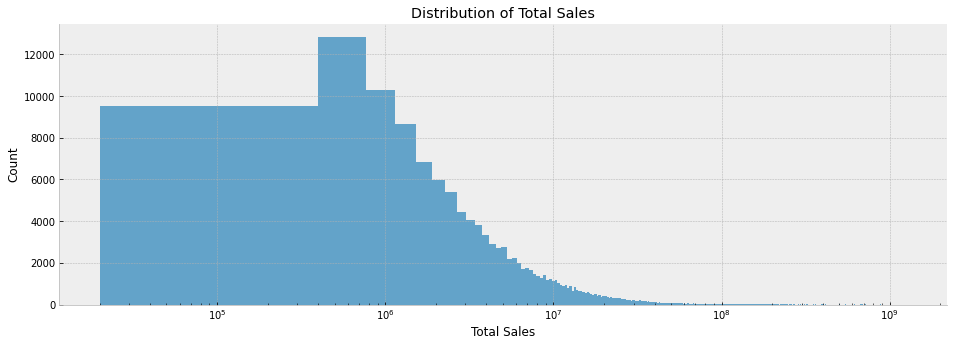

In [23]:
#Visualizing the distribution of total_Sales
t_sales = ticket_df.total_sales.values
ax =sns.displot(t_sales)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15.5 ,4.5)
plt.title("Distribution of Total Sales")
plt.xlabel('Total Sales')
plt.xscale('log')
plt.show()

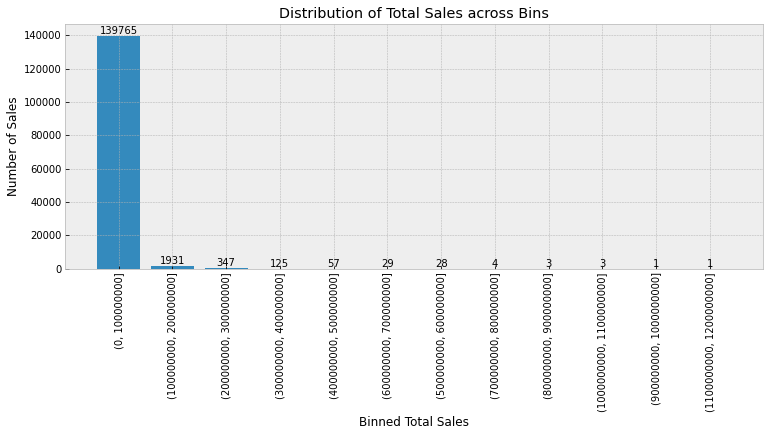

In [24]:
df_uni = ticket_df.copy()
#bins in the range of 0-100m upto 1300000000
bins = np.arange(0,1300000000,100000000)
df_uni['binned']=pd.cut(ticket_df['total_sales'],bins)

#creating a value count df with percentage of total sales in each bin
vc_df = df_uni.reset_index().groupby(['binned']).size().to_frame('count')
vc_df['percentage (%)'] = vc_df['count'].div(sum(vc_df['count'])).mul(100)
vc_df = vc_df.sort_values(by=['percentage (%)'], ascending=False)
vc_df = vc_df.reset_index()
vc_df['binned']=vc_df['binned'].astype('str')

#lets visualize the distributions across the bins 
x = vc_df['binned'].values
y = vc_df['count'].values
plt.bar(x,y)
plt.ylabel('Number of Sales')
plt.xlabel('Binned Total Sales')
plt.title('Distribution of Total Sales across Bins')
plt.xticks(rotation=90)
# code below is for displaying the number of sales on top of the bins 
for i,j in zip(x,y):
    label = "{:.1%}".format(j)
    plt.annotate(int(j),(i,j),textcoords='offset points',xytext=(0,2),ha='center',fontsize=10)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5, 4.5)
plt.show()


In [25]:
vc_df

,binned,count,percentage (%)
0,"(0, 100000000]",139765,98.222694
1,"(100000000, 200000000]",1931,1.357049
2,"(200000000, 300000000]",347,0.243861
3,"(300000000, 400000000]",125,0.087846
4,"(400000000, 500000000]",57,0.040058
5,"(600000000, 700000000]",29,0.020380
6,"(500000000, 600000000]",28,0.019678
7,"(700000000, 800000000]",4,0.002811
8,"(800000000, 900000000]",3,0.002108
9,"(1000000000, 1100000000]",3,0.002108


In [26]:
Q1 = ticket_df['total_sales'].quantile(.25) #25th quantile
print(f"The first quantile is {Q1}")
Q3 = ticket_df['total_sales'].quantile(0.75) #75th quantile
print(f"The third quantile is {Q3}")
IQR = Q3-Q1
print(f"The IQR range is {IQR}")
S = 1.5 * IQR #Threshold

#Upperbound - Anything above this is considered as an outlier
UB = Q3 + S

#Lowerbound - Anything below this is considered as an outlier
LB = Q1 - S

print(f"Valid range for Total_Sales : {LB} <= Total Sales <= {UB}")

The first quantile is 1270000.0
The third quantile is 11100000.0
The IQR range is 9830000.0
Valid range for Total_Sales : -13475000.0 <= Total Sales <= 25845000.0


In [27]:
mean = ticket_df['total_sales'].mean()
print(f'mean is {mean}')
std = ticket_df['total_sales'].std()
print(f'standard deviation is {std}')
if std>mean:
    print(f"standard deviation is {std/mean} higher than mean")

#simple function to carry out the emperical formula     
def empirical_rule(n=1 ,rt = False):
    UB = mean + (n* std)
    LB = mean - (n * std)
    if rt:
        return UB #returning Upper boundary for future use
    print(f"valid range for {n} std : {LB} <= Total Sales <= {UB}")

empirical_rule(1) #returns 1 * std range
empirical_rule(2) # returns 2 * std range
empirical_rule(3) # returns 3 * std range

#Removing outliers outside the upper bound of 3 * std as they would be considered as outliers for our dataset
UB = empirical_rule(3,rt=True)
ticket_df2=ticket_df[ticket_df['total_sales']<= UB]
print(f"Filtered total sales values <= {UB}")
mean =ticket_df2['total_sales'].mean() 
print(f"mean = {mean}")
std = ticket_df2['total_sales'].std() 
print(f"std  = {std}")
print(f"standard deviation is {std/mean} higher than mean")

mean is 12338325.170870375
standard deviation is 30627056.35678718
standard deviation is 2.4822701568195638 higher than mean
valid range for 1 std : -18288731.185916804 <= Total Sales <= 42965381.52765755
valid range for 2 std : -48915787.542703986 <= Total Sales <= 73592437.88444473
valid range for 3 std : -79542843.89949116 <= Total Sales <= 104219494.24123192
Filtered total sales values <= 104219494.24123192
mean = 9431057.905127015
std  = 14980741.718226833
standard deviation is 1.5884476448907008 higher than mean


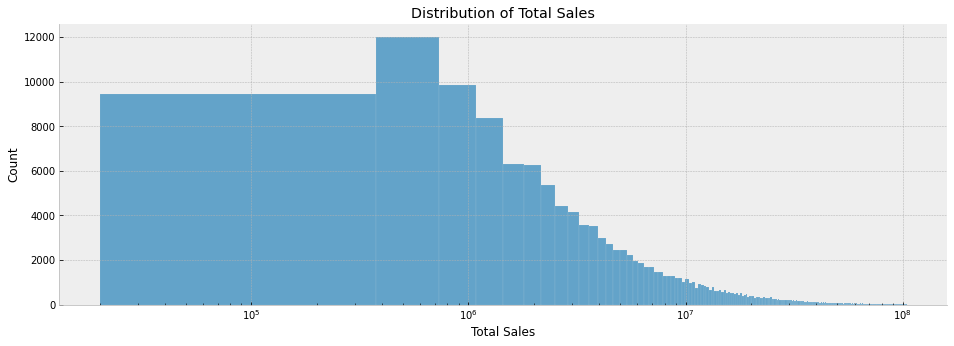

In [28]:
#Visualizing the total sales distribution without the outliers
t_sales = ticket_df2.total_sales.values
ax =sns.displot(t_sales)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15.5 ,4.5)
plt.title("Distribution of Total Sales")
plt.xlabel('Total Sales')
plt.xscale('log')
plt.show()

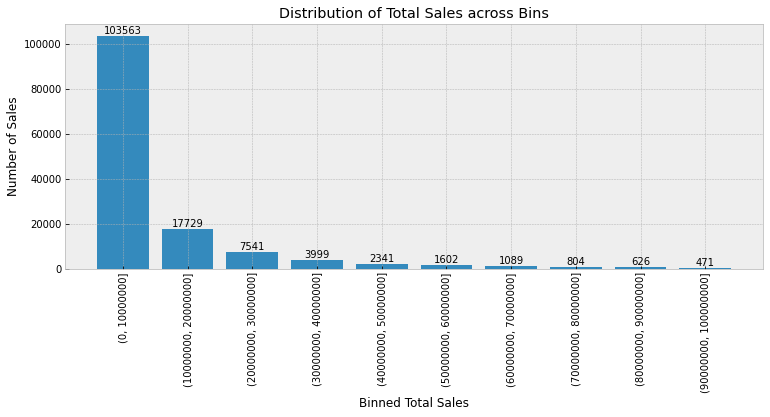

In [29]:
df_uni = ticket_df2.copy()
#bins in the range of 0-10m upto Upper bound
bins = np.arange(0,104219494,10000000)
df_uni['binned']=pd.cut(ticket_df2['total_sales'],bins)

#creating a value count df with percentage of total sales in each bin
vc_df = df_uni.reset_index().groupby(['binned']).size().to_frame('count')
vc_df['percentage (%)'] = vc_df['count'].div(sum(vc_df['count'])).mul(100)
vc_df = vc_df.sort_values(by=['percentage (%)'], ascending=False)
vc_df = vc_df.reset_index()
vc_df['binned']=vc_df['binned'].astype('str')

#lets visualize the distributions across the bins 
x = vc_df['binned'].values
y = vc_df['count'].values
plt.bar(x,y)
plt.ylabel('Number of Sales')
plt.xlabel('Binned Total Sales')
plt.title('Distribution of Total Sales across Bins')
plt.xticks(rotation=90)
# code below is for displaying the number of sales on top of the bins 
for i,j in zip(x,y):
    label = "{:.1%}".format(j)
    plt.annotate(int(j),(i,j),textcoords='offset points',xytext=(0,2),ha='center',fontsize=10)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5, 4.5)
plt.show()

In [30]:
vc_df

,binned,count,percentage (%)
0,"(0, 10000000]",103563,74.097950
1,"(10000000, 20000000]",17729,12.684864
2,"(20000000, 30000000]",7541,5.395485
3,"(30000000, 40000000]",3999,2.861231
4,"(40000000, 50000000]",2341,1.674954
5,"(50000000, 60000000]",1602,1.146210
6,"(60000000, 70000000]",1089,0.779165
7,"(70000000, 80000000]",804,0.575251
8,"(80000000, 90000000]",626,0.447895
9,"(90000000, 100000000]",471,0.336994


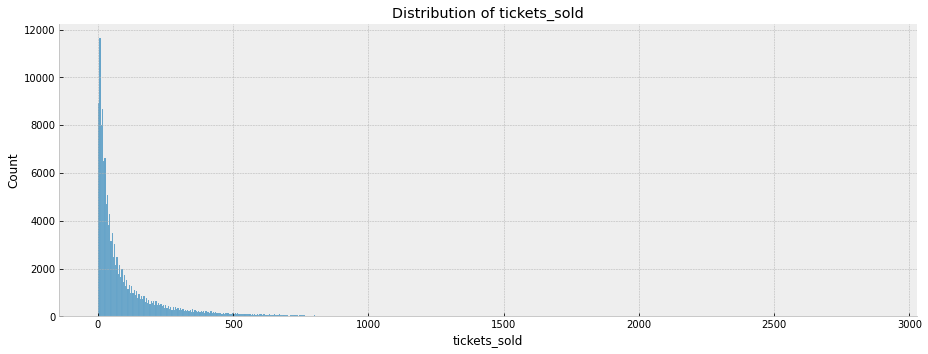

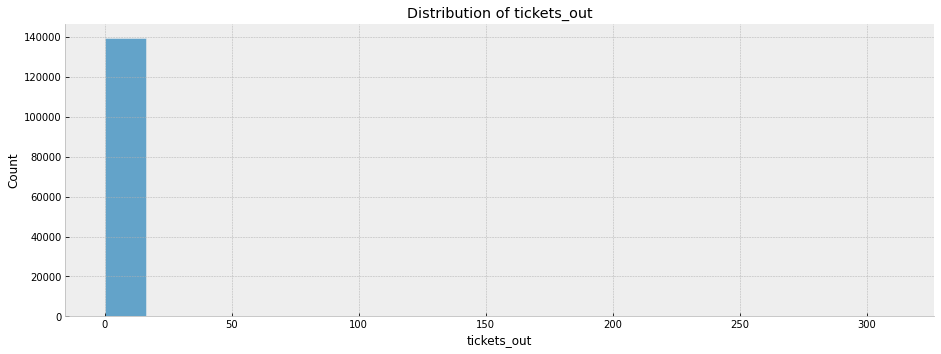

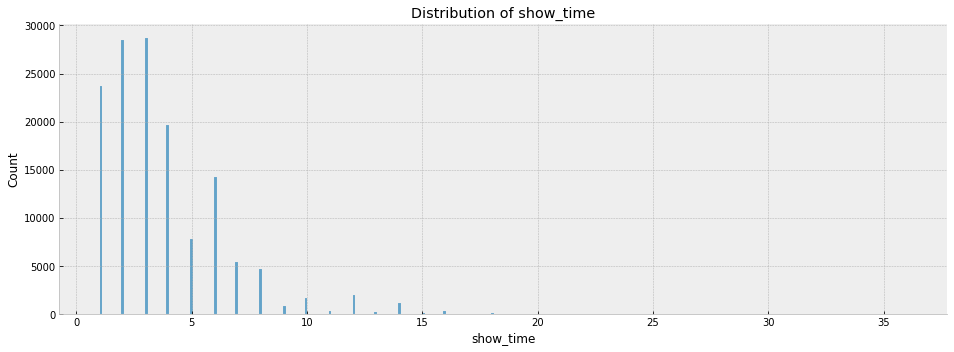

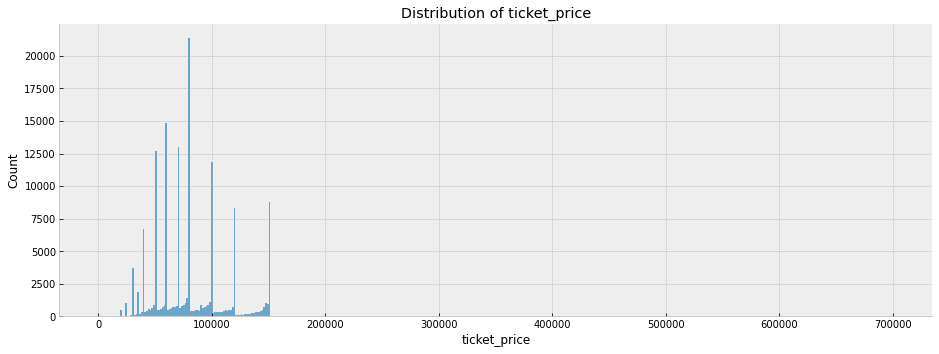

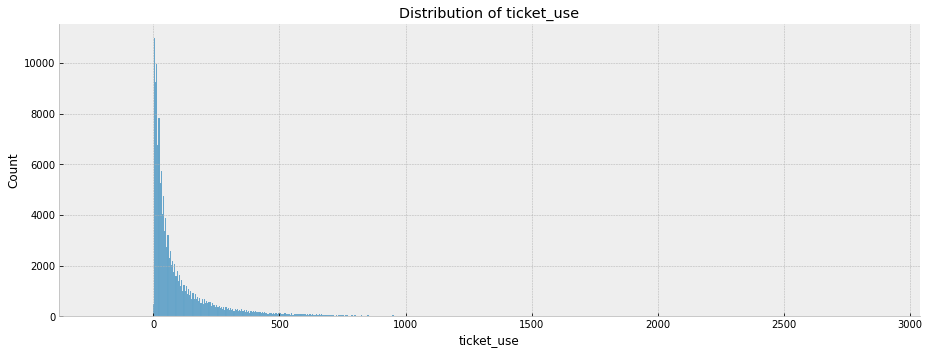

In [31]:
def viz(df,col):
    variable = df[col].values
    ax =sns.displot(variable)
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(15.5 ,4.5)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.show()

viz_cols = ['tickets_sold', 'tickets_out','show_time','ticket_price','ticket_use']    
for col in viz_cols:
    viz(ticket_df2,col)

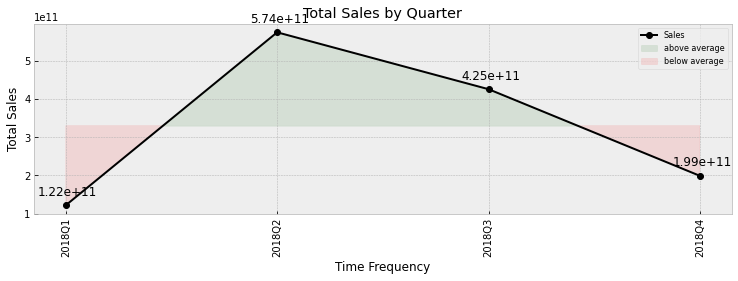

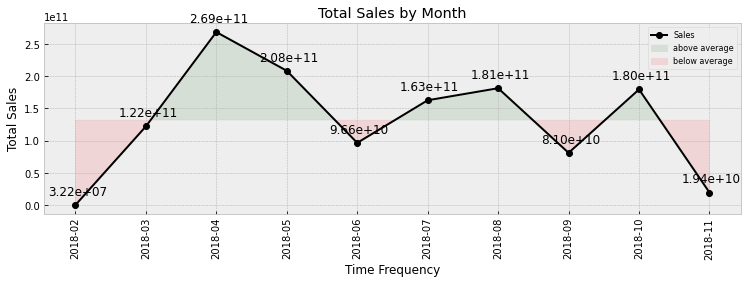

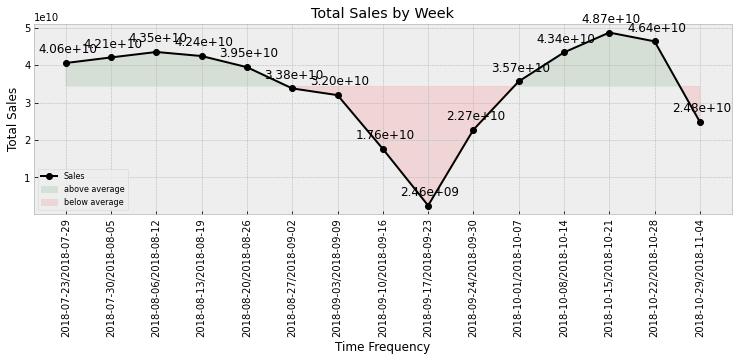

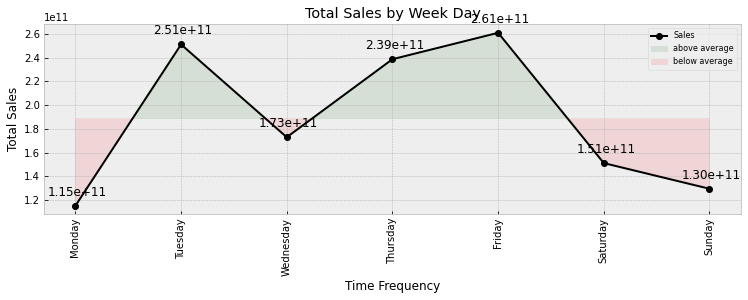

In [32]:
# Defining a fucntion to return an aggregrate by time period 
def aggregate_period(df, period,column, w_mean = False): 
    freq = df.date.dt.to_period(period)
    if w_mean == False:
        s = df.groupby(freq).agg({'total_sales': ['sum']})
        s.columns = ['met']
    else:
        s = df.groupby(freq).agg({column: ['mean']})
        s.columns = [f'met']
    s.reset_index(level=0, inplace=True)
    s.date= s.date.astype(str)
    return s

#Defining a function to return an aggregrate by days of the week
def aggregate_period_weekday(df,column, w_mean= False): 
    freq = df['date'].dt.day_name()
    if w_mean == False:
        s = df.groupby(freq).agg({'total_sales': ['sum']})
        s.columns = ['met']
    else:
        s = df.groupby(freq).agg({column: ['mean']})
        s.columns = [f'met']
    s.reset_index(level=0, inplace=True)
    s.date= s.date.astype(str)
    d = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    s = s.set_index('date').reindex(d).reset_index()
    return s

#Defining a function to visualize the distributions across different time periods 
def viz(df, title,n):
    date = df['date'][-n:] #the latest dates
    count_period =df['met'][-n:] #the latest sales

    plt.plot(date, count_period, linestyle='solid', color='black', marker='o')
    plt.title(f'{title}')
    plt.xlabel('Time Frequency')
    plt.ylabel("Total Sales")
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(12.5, 3.5)
    #to show the total sales 
    for x,y in zip(date,count_period):
        label = "{:.2e}".format(y)
        plt.annotate((label), # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(2,10), # distance from text to points (x,y)
                     ha='center' , fontsize=12) # horizontal alignment can be left, right or center

    overall_mean = count_period.mean()
    plt.fill_between(date, count_period,overall_mean,where=(count_period>overall_mean),alpha=0.10, interpolate=True, color='DarkGreen')
    plt.fill_between(date, count_period,overall_mean,where=(count_period<overall_mean),alpha=0.10, interpolate=True, color='Red')
    plt.legend(['Sales', 'above average', 'below average'], prop={'size': 8})
    plt.xticks(rotation=90)
    return plt.show()

q = aggregate_period(ticket_df2, 'q','na')
m = aggregate_period(ticket_df2, 'm','na')
w = aggregate_period(ticket_df2, 'w','na')
W = aggregate_period_weekday(ticket_df2,'na')
viz(q ,"Total Sales by Quarter",25)
viz(m ,"Total Sales by Month",25)
viz(w ,"Total Sales by Week",15)
viz(W ,"Total Sales by Week Day",15) 


In [33]:
#Aggregrate by Day 
df = aggregate_period(ticket_df2, 'd','na')
df.set_index('date',inplace=True)
df.rename(columns={'met':'Total_Sales'},inplace=True)
df.sample(10)

,Total_Sales
date,
2018-09-07,5916519996
2018-10-29,859461000
2018-08-14,9353300000
2018-10-28,3231999000
2018-05-08,11195134999
2018-07-01,2721569998
2018-07-02,2704864998
2018-05-26,3502782000
2018-10-02,6297059999


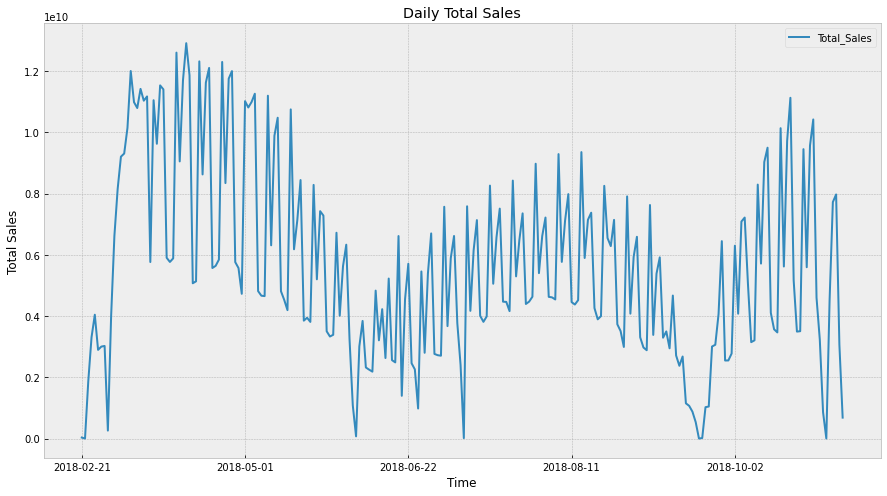

In [34]:
#Visualizing 
df.plot(figsize=(15,8))
plt.title("Daily Total Sales")
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.show()

In [35]:
#Defining a adf calculator to check the stationary state of the dataset 
def adf_calc(df, target):
    timeseries = df[target]
    result = adfuller(timeseries,autolag='AIC') #the adf function
    dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('Critical Value: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Lags used: %f' %result[2])
    print('Threshold Values:')
    for key, value in result[4].items(): #critical value dict
        print('%s: %.3f' % (key, value))
adf_calc(df , 'Total_Sales')

Critical Value: -2.252671
p-value: 0.187687
Lags used: 14.000000
Threshold Values:
1%: -3.461
5%: -2.875
10%: -2.574


In [36]:
#finding the log values of total sales
df['total_sales_log'] = np.log(df.Total_Sales)
df.head()

,Total_Sales,total_sales_log
date,,
2018-02-21,32030000,17.282184
2018-02-23,180000,12.100712
2018-03-14,1870938994,21.349706
2018-03-15,3309334994,21.920013
2018-03-16,4043241998,22.120313


In [37]:
# Defining a function to carry out the difference transform
def differencing(df,date, order=1):
    
    #setting date as datetime object and setting it as the index
    df[date]=pd.to_datetime(df[date],errors='coerce')
    df=df.set_index(date)
    
    print(f'The order of the transform is {order}')
    
    
    if order == 1:
        #calculate t-1
        df['t_minus_1']=df['total_sales_log'].shift(periods=1)
        
        #calculate first order dt
        df['target_order_dt']=df['total_sales_log'] - df['t_minus_1']
        
        
    elif order == 2:
        #calculate t-2
        df['t_minus_1']=df['total_sales_log'].shift(periods=1)
        df['first_order_dt']=df['total_sales_log'] - df['t_minus_1'] #returns 1st order
        #have to shift the first order values then subtract that from the first order values
        df['first_order_dt_minus_1']=df['first_order_dt'].shift(periods=1)
        df['target_order_dt']=df['first_order_dt'] - df['first_order_dt_minus_1'] # returns 2nd order dt
        
    elif order == 3:
        #calculate t=3 
        df['t_minus_1']=df['total_sales_log'].shift(periods=1)
        df['first_order_dt']=df['total_sales_log'] - df['t_minus_1'] # returns 1st order
        df['first_order_dt_minus_1']=df['first_order_dt'].shift(periods=1)
        df['second_order_dt']=df['first_order_dt'] - df['first_order_dt_minus_1'] # returns 2nd order
        df['second_order_dt_minus_1']=df['second_order_dt'].shift(periods=1)
        df['target_order_dt']=df['second_order_dt'] - df['second_order_dt_minus_1'] # returns 3rd order
        
    else:
        raise Exception("Order for this particular problem shoud be <=3 ")
   

    #lets visualize the dataset after transforming it
    df[['target_order_dt']].plot(figsize=(15,8))
    plt.title(f'Total Sales After Differencing with Order {order} Against Time')
    plt.xlabel('Time')
    plt.ylabel("Total Sales After Differencing")
    plt.show()
    
    return df

The order of the transform is 1


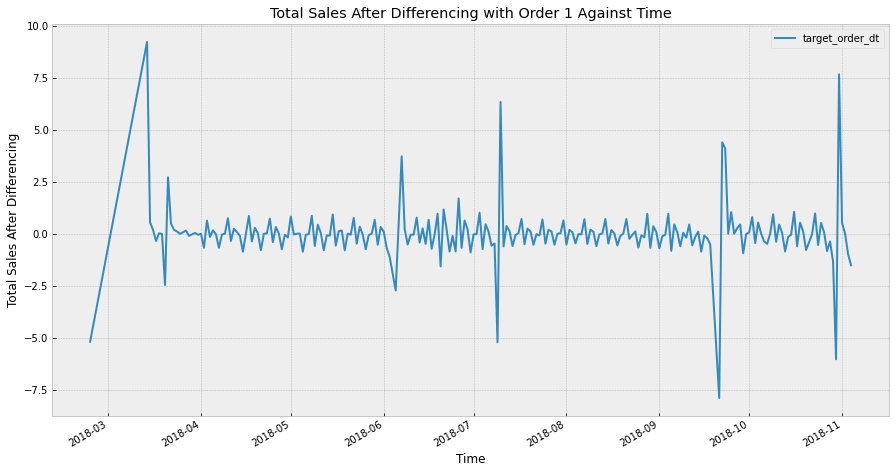

,Total_Sales,total_sales_log,t_minus_1,target_order_dt
date,,,,
2018-02-21,32030000,17.282184,NaN,NaN
2018-02-23,180000,12.100712,17.282184,-5.181471
2018-03-14,1870938994,21.349706,12.100712,9.248994
2018-03-15,3309334994,21.920013,21.349706,0.570307
2018-03-16,4043241998,22.120313,21.920013,0.200300
...,...,...,...,...
2018-10-31,4518978000,22.231552,14.543059,7.688493
2018-11-01,7722309998,22.767379,22.231552,0.535828
2018-11-02,7970860000,22.799058,22.767379,0.031679


The order of the transform is 2


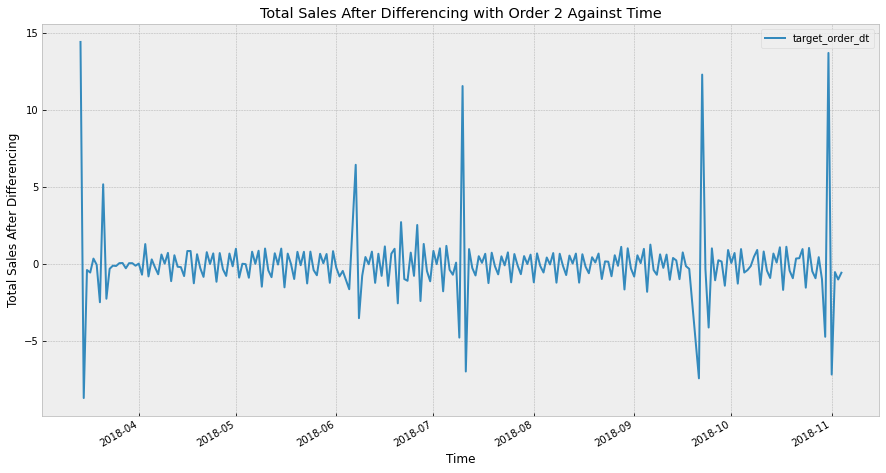

,Total_Sales,total_sales_log,t_minus_1,first_order_dt,first_order_dt_minus_1,target_order_dt
date,,,,,,
2018-02-21,32030000,17.282184,NaN,NaN,NaN,NaN
2018-02-23,180000,12.100712,17.282184,-5.181471,NaN,NaN
2018-03-14,1870938994,21.349706,12.100712,9.248994,-5.181471,14.430466
2018-03-15,3309334994,21.920013,21.349706,0.570307,9.248994,-8.678687
2018-03-16,4043241998,22.120313,21.920013,0.200300,0.570307,-0.370007
...,...,...,...,...,...,...
2018-10-31,4518978000,22.231552,14.543059,7.688493,-6.028757,13.717249
2018-11-01,7722309998,22.767379,22.231552,0.535828,7.688493,-7.152665
2018-11-02,7970860000,22.799058,22.767379,0.031679,0.535828,-0.504149


The order of the transform is 3


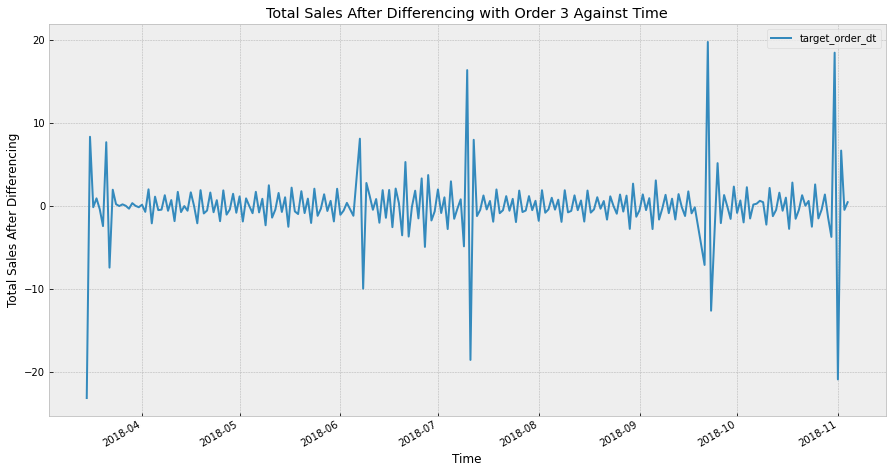

,Total_Sales,total_sales_log,t_minus_1,first_order_dt,first_order_dt_minus_1,second_order_dt,second_order_dt_minus_1,target_order_dt
date,,,,,,,,
2018-02-21,32030000,17.282184,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-23,180000,12.100712,17.282184,-5.181471,NaN,NaN,NaN,NaN
2018-03-14,1870938994,21.349706,12.100712,9.248994,-5.181471,14.430466,NaN,NaN
2018-03-15,3309334994,21.920013,21.349706,0.570307,9.248994,-8.678687,14.430466,-23.109153
2018-03-16,4043241998,22.120313,21.920013,0.200300,0.570307,-0.370007,-8.678687,8.308680
...,...,...,...,...,...,...,...,...
2018-10-31,4518978000,22.231552,14.543059,7.688493,-6.028757,13.717249,-4.704206,18.421456
2018-11-01,7722309998,22.767379,22.231552,0.535828,7.688493,-7.152665,13.717249,-20.869914
2018-11-02,7970860000,22.799058,22.767379,0.031679,0.535828,-0.504149,-7.152665,6.648516


In [38]:

df_temp = df.reset_index()
#1st order differencing
df1_dt = differencing(df_temp, 'date', order=1) 
display(df1_dt)
#2nd order differencing
df2_dt = differencing(df_temp, 'date', order=2)
display(df2_dt)
#3rd order differencing
df3_dt = differencing(df_temp, 'date', order=3)
display(df3_dt)

In [39]:
df2 = df1_dt.dropna()
print("check stationarity of order 1")
adf_calc(df2, 'target_order_dt')

check stationarity of order 1
Critical Value: -11.317874
p-value: 0.000000
Lags used: 5.000000
Threshold Values:
1%: -3.459
5%: -2.874
10%: -2.574


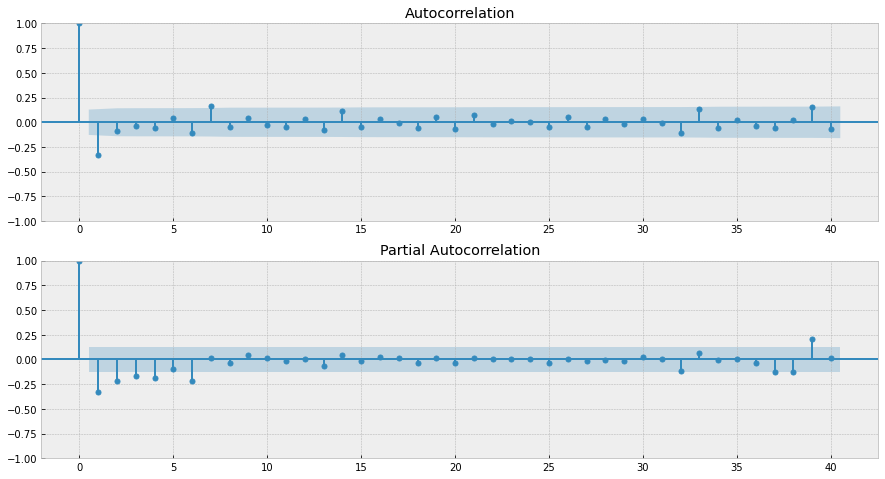

In [40]:
#Visualizing the Autocorrelation and the Partial autocorrelation curves
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2.target_order_dt,lags=40,ax=ax1) #autocorrealtion curve
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2.target_order_dt,lags=40,ax=ax2) #partialauto curve

In [41]:
auto_arima_fit = pm.auto_arima(df.Total_Sales, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                             seasonal=False, trace=True, error_action='ignore', suppress_warnings=True,
                             stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10750.720, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10815.731, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10788.290, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10756.123, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10813.733, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10752.129, Time=0.50 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10739.181, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10749.187, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10751.732, Time=0.80 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10744.299, Time=0.86 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=10757.280, Time=0.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10732.395, Time=1.42 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.93 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10712.241, Time=1.19 sec
 ARIMA(3,1,1)(0,0,0)[0] i

In [42]:
model = ARIMA(df.Total_Sales, order=(3,1,1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:            Total_Sales   No. Observations:                  234
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -5368.390
Date:                Thu, 18 May 2023   AIC                          10746.779
Time:                        13:32:56   BIC                          10764.035
Sample:                             0   HQIC                         10753.737
                                - 234                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1443      0.112      1.291      0.197      -0.075       0.363
ar.L2         -0.0619      0.092     -0.676      0.499      -0.241       0.118
ar.L3         -0.1827      0.081     -2.262      0.0

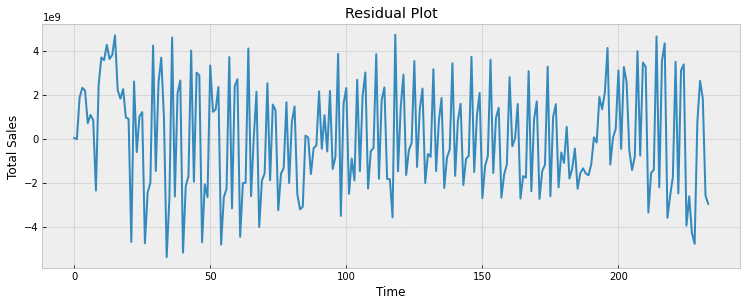

In [43]:
residuals = pd.DataFrame(results.resid)
temp_df = residuals.reset_index()
temp_df['date']=pd.to_datetime(temp_df['date'],errors='coerce')
residuals =temp_df.set_index('date')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5, 4.5)
plt.title('Residual Plot')
plt.xlabel('Time')
plt.ylabel("Total Sales")
plt.plot(residuals.values )

In [44]:
residuals.describe()

,0
count,2.340000e+02
mean,6.025680e+07
std,2.439944e+09
min,-5.380966e+09
25%,-1.827995e+09
50%,-3.874096e+08
75%,2.163601e+09
max,4.716531e+09


In [45]:
#defining a function to always reset time as the index after converting it a datetime object
def index_time(df, attribute):
    temp = df.reset_index()
    temp[attribute] = pd.to_datetime(temp[attribute],errors='coerce')
    df = temp.set_index(attribute)
    return df

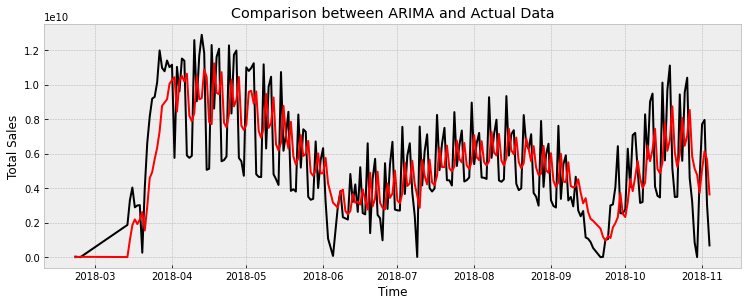

In [46]:
#plotting 
index_list=df.index.tolist()
preds= results.predict(0,233)
preds= preds.set_axis(index_list)
preds=preds.to_frame()
preds=index_time(preds,'index')#the pred values
df = index_time(df,'date') #the actual values

fig=matplotlib.pyplot.gcf()
fig.set_size_inches(12.5,4.5)
plt.title(f'Comparison between ARIMA and Actual Data')
plt.xlabel('Time')
plt.ylabel("Total Sales")

plt.plot(df.Total_Sales[:234],label='Actual', color = 'black')
plt.plot(preds,label = 'Predicted' , color = 'r')

In [47]:
#Defining a function to forecast future sales with the model
def get_forecast_values(df, N =30):
    last_date = df.reset_index().at[len(df)-1,'date'] #extracting the last date
    print(f"The last date is: {last_date}")
    forecast_date = pd.to_datetime(last_date) + pd.DateOffset(days=1)
    print(f"start forcast date: {forecast_date}")
    forecast = results.forecast(steps=N) #forecasting for N days 
    forecast_index = pd.date_range(start=forecast_date, periods=N)
    df_forecast = pd.DataFrame({'forecast':forecast.values},index=forecast_index)
    return df_forecast 

#Forecasting the Total sales for the next 30 days using the ARIMA Model
df_forecast = get_forecast_values(df,N = 30) 
df_forecast

The last date is: 2018-11-04 00:00:00
start forcast date: 2018-11-05 00:00:00


,forecast
2018-11-05,2.748645e+09
2018-11-06,4.090239e+09
2018-11-07,4.591190e+09
2018-11-08,4.203022e+09
2018-11-09,3.870921e+09
2018-11-10,3.755529e+09
2018-11-11,3.830357e+09
2018-11-12,3.908966e+09
2018-11-13,3.936754e+09
2018-11-14,3.922225e+09


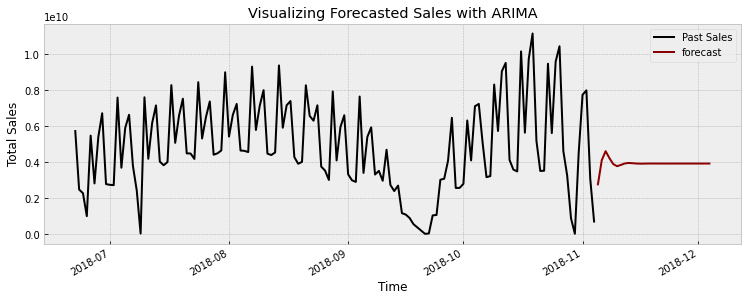

In [48]:
#visualizing the forecasted values
def forecast_plot(df, df_forecast, method):
    ci = df_forecast.values
    ax = df[100:].Total_Sales.plot(label='Past Sales', color ='black', figsize=(20, 15))
    df_forecast.plot(ax=ax,label='Forecasted Sales',color='darkred')
#     ax.fill_between(df_forecast.index,
#                     ci[:,-1],
#                     ci[:,0], color='g', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Sales')
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(12.5, 4.5)
    plt.legend()
    
    plt.title(f'Visualizing Forecasted Sales with {method}')
    plt.xlabel('Time')
    plt.ylabel("Total Sales")
    return plt.show()

forecast_plot(df, df_forecast, 'ARIMA')

In [49]:
auto_sarimax_fit = pm.auto_arima(df.Total_Sales, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                             seasonal=True,d=None,D=1, trace=True, error_action='ignore', suppress_warnings=True,
                             stepwise=True)



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.49 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=10445.621, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=10359.840, Time=0.84 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=10444.061, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=10395.094, Time=0.12 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=10354.922, Time=4.08 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=6.69 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.88 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=10429.369, Time=2.43 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=10353.225, Time=6.37 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=10360.993, Time=1.74 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=10.20 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.84 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : A

In [50]:
#Training the model with the optimal parameters 
model = SARIMAX(df.Total_Sales,order=(3, 0, 3),
              seasonal_order=(2, 1, 0, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         Total_Sales   No. Observations:                  234
Model:             SARIMAX(3, 0, 3)x(2, 1, [], 12)   Log Likelihood               -4492.547
Date:                             Thu, 18 May 2023   AIC                           9003.094
Time:                                     13:39:48   BIC                           9032.551
Sample:                                          0   HQIC                          9015.021
                                             - 234                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.2075      0.050     44.089      0.000       2.109       2.306
ar.L2         -2.1635      0.078    -27.856      0.000      -2.316      -2.011
ar.L3          0.9221      0.051     18.052      0.000       0.822       1.022
ma.L1         -1.9913      0.103    -19.306      0.000      -2.193      -1.789
ma.L2          1.7399      0.153     11.361      0.000       1.440       2.040
ma.L3         -0.5496      0.098     -5.614      0.000      -0.741      -0.358
ar.S.L12      -0.6601      0.117     -5.646      0.000      -0.889      -0.431
ar.S.L24      -0.1774      0.108     -1.647      0.100      -0.389       0.034
sigma2      8.117e+18   2.37e-21   3.42e+39      0.000    8.12e+18    8.12e+18
===================================================================================
Ljung-Box (L1) (Q):                   2.07   Jarque-Bera (JB):                 3.56
Prob(Q):                              0.15   Prob(JB):                         0.17
Heteroskedasticity (H):               0.93   Skew:                             0.13
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.42e+56. Standard errors may be unstable.
"""

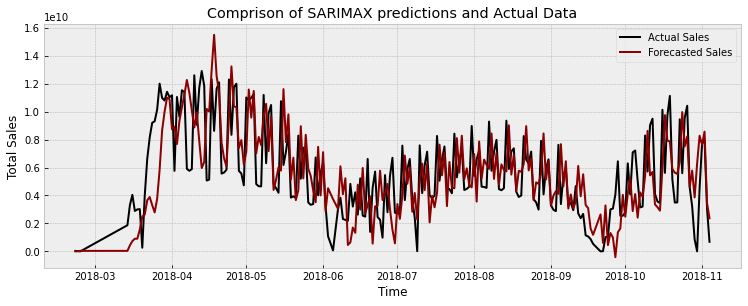

In [68]:
index_list = df.index.tolist()
preds = results.predict(0,233)
preds= preds.set_axis(index_list)
preds = preds.to_frame()
preds = index_time(preds, 'index')
df = index_time(df , 'date')


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5,4.5)
plt.title("Comprison of SARIMAX predictions and Actual Data")
plt.xlabel("Time")
plt.ylabel("Total Sales")
plt.plot(df.Total_Sales[:234],label='Actual Sales' , color = 'k')
plt.plot(preds, label="Forecasted Sales", color = 'darkred')
plt.legend()

In [52]:
df_forecast = get_forecast_values(df, N =30)
df_forecast

The last date is: 2018-11-04 00:00:00
start forcast date: 2018-11-05 00:00:00


,forecast
2018-11-05,9.572470e+06
2018-11-06,1.729308e+09
2018-11-07,6.705803e+09
2018-11-08,6.935816e+09
2018-11-09,9.429411e+09
2018-11-10,2.960584e+09
2018-11-11,6.905832e+08
2018-11-12,1.529617e+09
2018-11-13,1.958440e+09
2018-11-14,5.962454e+09


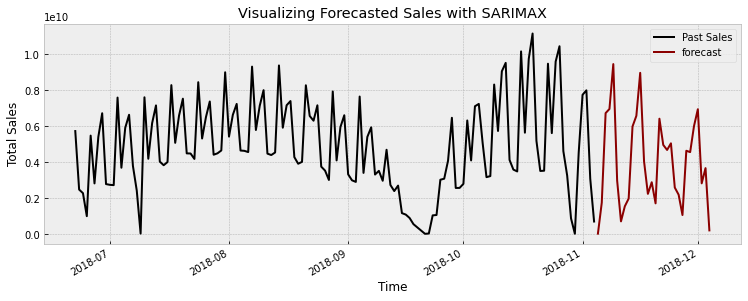

In [53]:
#visualize the forecast 
forecast_plot(df, df_forecast,'SARIMAX')

In [76]:
joblib.dump(results, "sarimax_model.pkl")
joblib.dump(df, "df.pkl")

['df.pkl']